In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import copy

In [2]:
# parameter
data = xr.open_dataset('dataGCM/output/beta-plane/simulation_beta-plane_1rads_4K.nc')
timeIndex = 0
g = 9.81
alphaT = 3.3e-4
h = 0.152
zMiddle = 224
zSlope = 126
temperature = data['Temp']
T = temperature[timeIndex,:,:,:].data
gridZ = data['Z']
yInner = 20
yOuter = 164

In [3]:
# function to calculate the buoyancy frequency
def computeN0(Tdata):
    N0 = gridZ - gridZ
    for zIndex in range(1, np.shape(gridZ)[0] - zSlope - 1):
        dTz = (np.nanmean(Tdata[zIndex+1, :, :]) - np.nanmean(Tdata[zIndex-1, :, :]))/2/(float(gridZ[1] - gridZ[0]))
        N0[zIndex] = np.sqrt(abs(g * alphaT * dTz))
    return N0

def computeN0_boundary(Tdata):
    N0 = gridZ - gridZ
    Tdata2 = copy.deepcopy(Tdata)
    Tdata2[:, 0:yInner, :] = np.nan
    Tdata2[:, yOuter:, :] = np.nan
    for zIndex in range(1, np.shape(gridZ)[0] - zSlope - 1):
        dTz = (np.nanmean(Tdata2[zIndex+1, :, :]) - np.nanmean(Tdata2[zIndex-1, :, :]))/2/(float(gridZ[1] - gridZ[0]))
        N0[zIndex] = np.sqrt(abs(g * alphaT * dTz))
    return N0

Text(0.5, 1.0, 'Middle Height Level $N_0$ = 0.25 [1/s]')

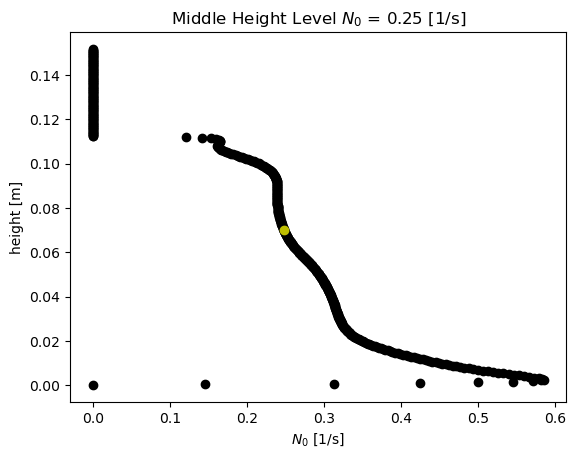

In [4]:
# compute and plot
N0_test = computeN0(T)
plt.scatter(N0_test, -gridZ, color = 'k')
plt.scatter(N0_test[zMiddle], -gridZ[zMiddle], color = 'y')
plt.ylabel('height [m]')
plt.xlabel(r'$N_0$ [1/s]')
plt.title('Middle Height Level ' + r'$N_0$ = ' + str(np.around(float(N0_test[zMiddle]), 2)) + ' [1/s]')

Text(0.5, 1.0, 'Middle Height Level $N_0$ = 0.25 [1/s] without side boundaries')

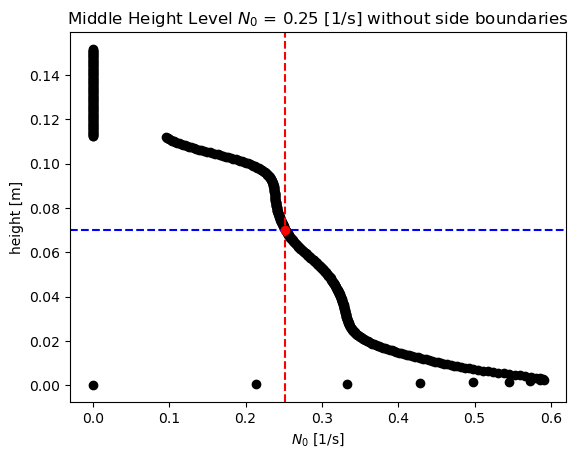

In [5]:
# compute and plot without the side boundaries
N0 = computeN0_boundary(T)
plt.scatter(N0, -gridZ, color = 'k')
plt.axvline(x = N0[zMiddle], color = 'r', linestyle = '--')
plt.axhline(y = -gridZ[zMiddle], color = 'b', linestyle = '--')
plt.scatter(N0[zMiddle], -gridZ[zMiddle], color = 'r', zorder = 2)
plt.ylabel('height [m]')
plt.xlabel(r'$N_0$ [1/s]')
plt.title('Middle Height Level ' + r'$N_0$ = ' + str(np.around(float(N0[zMiddle]), 2)) + ' [1/s] without side boundaries')